*Prokofiev_Rachmaninoff_Model.ipynb* <p style='text-align: right;'> <b> September 20th 2020 </b> </p>
<p style='text-align: right;'> <b> David Diston </b> </p>

# Build an LSTM RNN to Classify Music by Prokofiev and Rachmaninoff

***Once again, trial-and-error tuning was performed when developing this model. The final model iteration is shown here***

Here I will build an LSTM RNN that will attempt to classify music as either having been composed by Prokofiev (1891-1953) and Rachmaninoff (1873-1943). Both of these composers are Russian, and from the same compositional epoch. Since they compose in a similar style, I hypothesise that this model will have a more difficult time classifying than other models tested so far.

As with the data preprocessing notebook, this model notebook follows the same structure as the last model notebook. Therefore, the explainatory commenting will be lower in quantity and focus on differences between these notebooks. If further clarification is required please refer to the `11-RNN_Model_Composers.ipynb` notebook.

In [1]:
import numpy as np
import os
import tensorflow
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Usual function to import data
def training_set(cat, datdir):
    for category in cat:
        path = os.path.join(datdir, category)
        class_num = categories.index(category)
        for array in os.listdir(path):
            try:
                midi_array = np.load(os.path.join(path, array))
                training_data.append([midi_array, class_num])
            except Exception as e:
                pass

In [3]:
# Load Training Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Data'
categories = ['Prokofiev', 'Rachmaninoff']

training_data = []

training_set(categories, datadirectory)

random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [4]:
# Load Validation Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Validation_Set_Data'
categories = ['Prokofiev', 'Rachmaninoff']
    
training_data = []
    
training_set(categories, datadirectory)

random.shuffle(training_data)

X_val = []
y_val = []

for features, label in training_data:
    X_val.append(features)
    y_val.append(label)

In [5]:
# Convert data to array and transform
X_train = np.array(X).reshape(-1, 200, 88)
y_train = np.array(y)
X_val = np.array(X_val).reshape(-1, 200, 88)
y_val = np.array(y_val)

# Normalize data between 0 and 1
X_train = X_train / 127
X_val = X_val / 127

In [18]:
# Instantiate the model
Prokofiev_Rachmaninoff_model = Sequential()

Prokofiev_Rachmaninoff_model.add(LSTM(88, input_shape = (X_train.shape[1:]), activation = 'relu', return_sequences = True))
Prokofiev_Rachmaninoff_model.add(Dropout(0.1))

Prokofiev_Rachmaninoff_model.add(LSTM(88, activation='relu'))
Prokofiev_Rachmaninoff_model.add(Dropout(0.1))

Prokofiev_Rachmaninoff_model.add(Dense(1408, activation='relu'))
Prokofiev_Rachmaninoff_model.add(Dropout(0.1))

Prokofiev_Rachmaninoff_model.add(Dense(2, activation='sigmoid'))

In [19]:
# Define the optimizer
opt = Adam(lr = 0.0001, decay = 0.00001, clipvalue=0.5)

# Compile model
Prokofiev_Rachmaninoff_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = opt,
    metrics=['accuracy'])

Prokofiev_Rachmaninoff_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200, 88)           62304     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 88)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 88)                62304     
_________________________________________________________________
dropout_7 (Dropout)          (None, 88)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1408)              125312    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [20]:
# Create checkpoint to record best weights
checkpoint = ModelCheckpoint('Models/Prokofiev_Rachmaninoff_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
Prokofiev_Rachmaninoff_model.fit(X_train, y_train,
               batch_size = 10,
               epochs = 10,
               validation_data=(X_val, y_val),
               callbacks=callbacks_list)

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5155
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Models/Prokofiev_Rachmaninoff_model.hdf5
200/200 [==============================] - 15s 73ms/step - loss: 0.6928 - accuracy: 0.5155 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.5410
Epoch 00002: val_accuracy improved from 0.50000 to 0.57500, saving model to Models/Prokofiev_Rachmaninoff_model.hdf5
200/200 [==============================] - 14s 71ms/step - loss: 0.6896 - accuracy: 0.5410 - val_loss: 0.6822 - val_accuracy: 0.5750
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.7966 - accuracy: 0.6465
Epoch 00003: val_accuracy improved from 0.57500 to 0.61500, saving model to Models/Prokofiev_Rachmaninoff_model.hdf5
200/200 [==============================] - 14s 71ms/step - loss: 0.7966 - accuracy: 0.6465 - val_l

In [21]:
# Save the full model
Prokofiev_Rachmaninoff_model.save('Models/Prokofiev_Rachmaninoff_model')

INFO:tensorflow:Assets written to: Models/Prokofiev_Rachmaninoff_model\assets


### Model Evaluation

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
# Confusion matrix plotting function
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
# Load Test Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Test_Set_Data'
categories = ['Prokofiev', 'Rachmaninoff']
    
training_data = []
    
training_set(categories, datadirectory)

random.shuffle(training_data)

X_test = []
y_test = []

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, 200, 88)
y_test = np.array(y_test)

# Normalization
X_test = X_test / 127

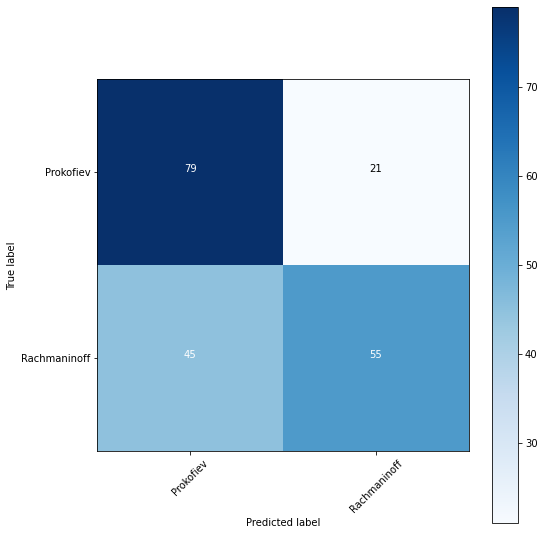

In [25]:
# Get predictions from test data
results = Prokofiev_Rachmaninoff_model.predict(X_test, batch_size = 10)

# Convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = ['Prokofiev', 'Rachmaninoff']

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

In [26]:
# Print classification report
CR = classification_report(y_test, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       100
           1       0.72      0.55      0.63       100

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



While I did not expect this model to be as successful as others I have created in this project, the way in which this model is less successful is interesting. I am surprised to see that the model had a much more difficult time classifying music by Rachmaninoff than Prokofiev. This is interesting to me, as to my ear, each of these composers compose in a similar style. Therefore I am unsure as to why one composer would be so much more difficult to classify than the other. Perhaps an explaination could simply be the comparably lower sample size used in this model, however the same sample size was used to train the Debussy-Mozart model to great success.

In future I would be interested to explore this observation further by perhaps comparing each of these composers to others in the dataset. It would be interesting to see if the same pattern of classification difficulties are present between other composer comparrisons, or if the model difficulty classifying Rachmaninoff is somewhat unique to the comparrison with Prokofiev.